# **Assignment 5: Consumer segmentation using PCA**

By : Charlotte Le Bihan

**AI Usage Statement:**
I used ChatGPT as a support tool while working on this assignment. It helped me check that my code was running correctly, refine the clarity of my explanations, and better understand a few concepts I was unsure about. The AI’s role was mainly to guide my reasoning and help me express my ideas more precisely. All analyses, interpretations, and final answers were fully decided and written by me.

### **1. Import, scale, and summarize the data. (1 point)**

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from adjustText import adjust_text

In [4]:
df = pd.read_csv("Questionaire data.csv")

df.head()

,Resp,X1,X2,X3,X4,X5
0,1,6,0,8,4,4
1,2,4,9,2,8,9
2,3,2,8,2,6,9
3,4,5,7,3,9,6
4,5,3,8,3,9,6


In [5]:
scaler = StandardScaler() #creating an “empty scaler object”, like creating a calculator
X_scaled = scaler.fit_transform(df) # .fit learns the means / standard deviation and then .transform applies z = X−mean / sd   

# X scaled is a Numpy array thus we convert it to DataFrame for clarity
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)
df_scaled.head()

,Resp,X1,X2,X3,X4,X5
0,-1.675247,0.552931,-1.706482,1.605061,-0.489698,-0.190368
1,-1.559712,-0.138233,1.285402,-0.617331,0.909439,1.594335
2,-1.444178,-0.829396,0.952971,-0.617331,0.209871,1.594335
3,-1.328644,0.207349,0.620539,-0.246932,1.259224,0.523513
4,-1.213110,-0.483814,0.952971,-0.246932,1.259224,0.523513


In [16]:
df_scaled.describe()

,Resp,X1,X2,X3,X4,X5
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,1.480297e-17,-1.628327e-16,-1.221245e-16,4.440892e-17,-8.511710e-17,4.440892e-17
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.675247e+00,-1.520560e+00,-1.706482e+00,-1.358128e+00,-1.888836e+00,-1.618131e+00
25%,-8.376234e-01,-8.293962e-01,-8.754034e-01,-6.173310e-01,-1.014375e+00,-9.042494e-01
50%,0.000000e+00,2.073491e-01,2.881074e-01,-2.469324e-01,2.098706e-01,-1.903683e-01
75%,8.376234e-01,8.985126e-01,8.698628e-01,7.716637e-01,9.094394e-01,5.235128e-01
max,1.675247e+00,1.589676e+00,1.285402e+00,1.975459e+00,1.259224e+00,1.594335e+00


### **2. Present the matrix of correlations for the five variables (X1-X5) and plot the correlations. Explain (in words) your inferences based on this exploratory analysis. (1 point)**

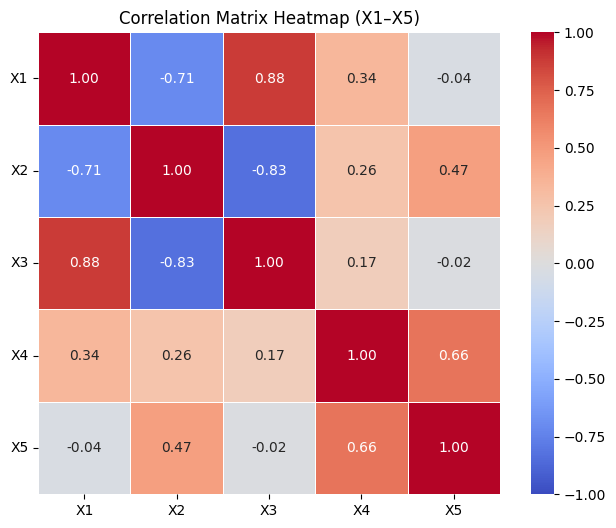

In [25]:
# Correlation matrix for the five attitude variables
att_cols = ["X1", "X2", "X3", "X4", "X5"]
corr_matrix = df[att_cols].corr()

corr_matrix  # optional: to see the numbers in table form

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
    square=True
)
plt.title("Correlation Matrix Heatmap (X1–X5)")
plt.yticks(rotation=0)
plt.show()


**Interpretation of the correlation matrix**

The correlation matrix shows two main sets of related attitudes. First, X1 (“I never go back to a store that treated me with disrespect”) and X3 (“I greatly appreciate a salesperson who spends time answering my questions”) are strongly positively correlated (about 0.88). People who care about respectful treatment also tend to value attentive, time-consuming service, which points to a “service-seeking” attitude.

X2 (“I find salespeople who fawn over me irritating”) is strongly negatively correlated with both X1 (around −0.71) and X3 (around −0.83). Consumers who dislike interacting with salespeople are less sensitive to respectful treatment and less interested in help and explanations. This suggests an opposite profile: more independent shoppers who prefer minimal interaction.

A second pattern appears between X4 (“I care little for fancy displays in department stores”) and X5 (“Discount stores are much more of a bargain than department stores”), which are moderately positively correlated (around 0.66). Shoppers who do not value fancy displays also tend to see discount stores as better bargains, indicating a more price- and value-oriented mindset. The positive correlations between X2 and X5 (≈ 0.47) and between X1 and X4 (≈ 0.34) further connect irritation with salespeople and indifference to displays to this value orientation.

Overall, these correlations suggest that the five variables are not independent but cluster around two underlying themes: preference for personal service versus independence, and focus on price/value versus store “experience”. This structure motivates the use of PCA to reduce the data to a smaller number of meaningful dimensions.

### **3. Perform PCA on the data and show the results (including the summary of the PCA and the matrix showing the relationship between the factors and original attributes). (1 point)**

Personal note : PCA does not create clusters of consumers or hard groups of variables; it uses correlation patterns to construct a few new summary dimensions that concentrate the information, which we can then use to visualize or cluster consumers more easily.

In [26]:
# five attitude variables
att_cols = ["X1", "X2", "X3", "X4", "X5"]
X_scaled = df_scaled[att_cols]   # df_scaled is already standardized

# fit PCA and get scores
pca = PCA()
pca_scores = pca.fit_transform(X_scaled) # scores for each respondent

# summary of eigenvalues and explained variance
explained_var = pca.explained_variance_
explained_ratio = pca.explained_variance_ratio_
cum_ratio = np.cumsum(explained_ratio)

pca_summary = pd.DataFrame({
    "Eigenvalue": explained_var,
    "Explained variance ratio": explained_ratio,
    "Cumulative variance ratio": cum_ratio
}, index=[f"PC{i+1}" for i in range(len(att_cols))])

print("PCA summary:")
pca_summary


PCA summary:


,Eigenvalue,Explained variance ratio,Cumulative variance ratio
PC1,2.763710,0.534317,0.534317
PC2,1.916084,0.370443,0.904760
PC3,0.353756,0.068393,0.973153
PC4,0.096871,0.018728,0.991881
PC5,0.041993,0.008119,1.000000


In [27]:
# PCA loadings (relationship between PCs and original attributes)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(att_cols))],
    index=att_cols
)

print("\nPCA loadings (components):")
loadings


PCA loadings (components):


,PC1,PC2,PC3,PC4,PC5
X1,0.554917,0.232489,-0.279564,0.723423,-0.191098
X2,-0.570631,0.211772,-0.183290,0.462164,0.618338
X3,0.579641,0.156752,0.310604,-0.186671,0.712828
X4,0.016985,0.685978,-0.561098,-0.461129,-0.040926
X5,-0.173709,0.637153,0.690610,0.124810,-0.267097


**Interpretation:**

The PCA decomposes the five attitude items into five principal components, but most of the variation is concentrated in the first two. Together, PC1 and PC2 explain around three quarters of the total variance in the data, which means that the consumers’ answers can be summarized reasonably well in just two underlying dimensions. The remaining components each account for only a small share of variance and mainly capture residual noise or very specific patterns.

Looking at the loadings matrix, PC1 has strong positive weights on X1 (“I never go back to a store that treated me with disrespect”) and X3 (“I greatly appreciate a salesperson who spends time answering my questions”), and a strong negative weight on X2 (“I find salespeople who fawn over me irritating”). This component clearly contrasts shoppers who value respectful, attentive service with those who prefer to be left alone; it is a “service vs. independence” axis.

PC2 is dominated by X4 (“I care little for fancy displays in department stores”) and X5 (“Discount stores are much more of a bargain than department stores”), both with high positive loadings. Consumers with high PC2 scores care less about store atmosphere and are more convinced by the value of discount stores. PC2 therefore reflects a “price/value orientation vs. department-store experience” dimension.

In summary, the PCA shows that responses to the five questions can be reduced to two main latent attitudes: one about the desired level of personal service and one about the importance of bargain prices and simple store formats. These dimensions will be used later to map and segment consumers.

### **4. Write down the five equations that formally define the relationship between the original attributes and the factors from the PCA. (1 point)**

The principal components can be written as linear combinations of the standardized variables:

- PC1 = 0.555·X1 ​− 0.571·X2 ​+ 0.580·X3 ​+ 0.017·X4​ −0.174·X5​

- PC2 = 0.232·X1 ​+ 0.212·X2 ​+ 0.157·X3​ + 0.686·X4​ + 0.637·X5​

- PC3 = −0.280·X1 − 0.183·X2​ + 0.311·X3 ​− 0.561·X4 ​+ 0.691·X5​

- PC4 = 0.723·X1 ​+ 0.462·X2 ​− 0.187·X3 ​−0.461·X4 ​+ 0.125·X5​

- PC5 = −0.191·X1​ + 0.618·X2 ​+ 0.713·X3​ − 0.041·X4 ​− 0.267·X5​

### **5. How many factors or principal components should we retain? Explain your decision. (1.5 points)**

***Personal note :*** The Kaiser criterion recommends keeping only the components whose eigenvalues are greater than 1, since these components explain more variance than a single standardized original variable. It is a heuristic rule rather than a strict mathematical law.

The first two principal components account for 44.55% and 31.24% of the variance, respectively, for a cumulative total of 75.79%. Together, they summarize most of the structure in the data and allow us to represent the consumers’ attitudes clearly in two dimensions, which is especially useful for visualization and segmentation later in the assignment.

Using the Kaiser criterion (eigenvalue > 1), we could retain three components, since PC1, PC2, and PC3 all exceed this threshold. However, adding a third component would increase complexity without substantially improving interpretability.

Therefore, retaining two components provides the best balance between simplicity and information retained, and is appropriate for the exploratory goals of this assignment.

### **6. Can you think of intuitive names for the first and second factors? What do these factors represent? Explain how you arrived at them. Hint: Use the equations that quantify the relationship between the original attributes and the factors from the PCA (from answer to Question 4) and focus on strong correlations. (2 points)**

Looking at the loadings, the first component is mainly driven by X1 and X3, which both have strong positive weights, while X2 has a strong negative weight. X1 and X3 reflect appreciation for respectful and helpful salesperson interaction, whereas X2 expresses irritation with salespeople. Because PC1 increases when respondents value personal assistance and decreases when they prefer minimal interaction, an intuitive name for this component is “Preference for personal service” or “Attitude toward salesperson interaction.”

The second component is dominated by X4 and X5, which both have large positive loadings. These items correspond to indifference toward store atmosphere and a belief that discount stores offer better value. High scores on PC2 therefore indicate a stronger “Bargain-oriented, low-frills preference.”

These names follow directly from the variables that load most heavily on each component and align with the meanings of the underlying survey statements.

### **7. Now plot all the consumers on a two-dimensional map based on the first two principal components. Label the x and y-axis using the names from your answer to the previous question. (1.5 points)**

14 [0.25948471 0.77607836]
17 [-0.45352154  0.76355834]
12 [0.66312987 0.4590101 ]
26 [ 0.9047972  -0.09921155]


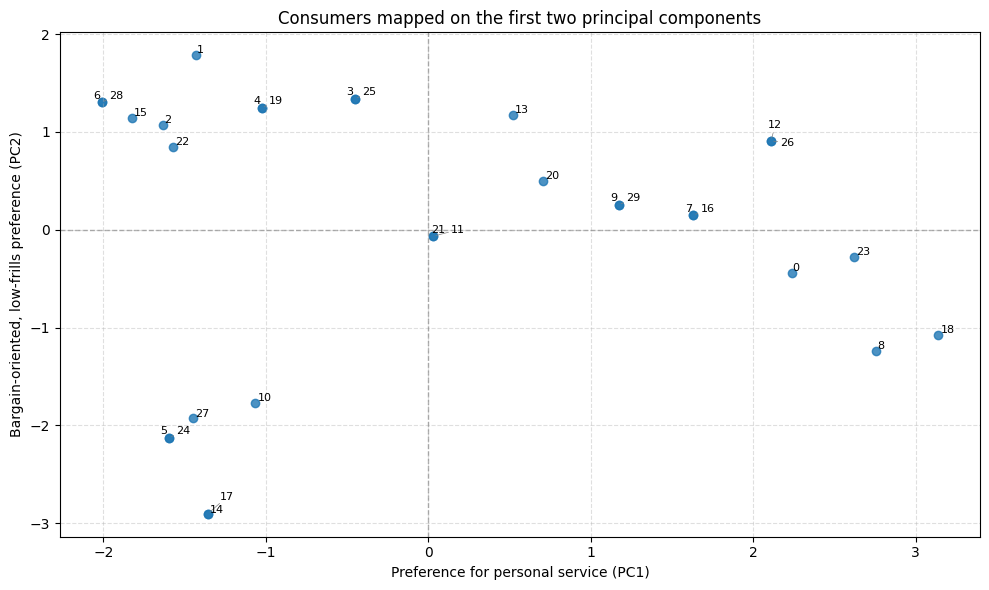

In [39]:
# Extract the first two principal component scores
pc1 = pca_scores[:, 0]
pc2 = pca_scores[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(pc1, pc2, alpha=0.8)

# Labeling axes using the names from Question 6
plt.xlabel("Preference for personal service (PC1)")
plt.ylabel("Bargain-oriented, low-frills preference (PC2)")
plt.title("Consumers mapped on the first two principal components")

# Add reference lines at 0 to show quadrants (useful for segmentation)
plt.axhline(0, color="grey", linewidth=1, linestyle="--", alpha=0.6)
plt.axvline(0, color="grey", linewidth=1, linestyle="--", alpha=0.6)

# grid for readability
plt.grid(True, linestyle="--", alpha=0.4)

# some points overlap so this is to show which ones overlap by labeling 
texts = []
for i in range(len(pc1)):
    texts.append(plt.text(pc1[i], pc2[i], str(i), fontsize=8))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.tight_layout()
plt.show()


### **8. Based on the plot from the previous answer, how many segments (roughly) do you find in the market? Hint: A segment is a group of consumers who are similar to each other in their tastes and preferences. (2 points)**

Looking at the PCA map, the respondents do not form a single homogeneous cloud. Instead, several groups appear in different regions of the plot. A reasonable interpretation is that the market contains three broad segments:

1. Service-oriented consumers (high PC1) :
These consumers cluster on the right side of the map. They show a strong preference for personal assistance and respectful salesperson interaction, indicating that service quality is an important part of their shopping experience.

2. Service-avoiding consumers (low PC1) :
Located on the left side of the map, these respondents prefer to shop independently and show discomfort with salesperson involvement. They value autonomy more than personal service.

3. Strong bargain-seekers (high PC2) : 
These consumers are concentrated toward the upper part of the map. They place high importance on discounts and low prices, and they tend to be less concerned with store atmosphere or premium service features.

Together, these three groups summarize the main attitudinal structure visible in the PCA plot and capture clear differences in how consumers think about service and store value.

### **9. Describe the characteristics of each segment. Discuss the relationship between the segment characteristics and the original attributes? (2 points)**

**Segment 1: Service-oriented consumers**

Consumers on the right side of the PCA map score high on PC1, which reflects strong positive loadings on X1 (“I never go back to a store that treated me with disrespect”) and X3 (“I greatly appreciate a salesperson who spends time answering my questions”), along with a negative loading on X2 (“I find salespeople who fawn over me irritating”). These individuals value respectful, attentive service and welcome interaction with sales staff. Their attitudes suggest that the quality of personal assistance is an important part of their shopping experience.

**Segment 2: Service-avoiding consumers**

Consumers on the left side of the map show low PC1 scores, meaning their attitudes run opposite to Segment 1. They are more likely to agree with X2 (discomfort with salesperson involvement) and place less emphasis on respectful or helpful service (lower X1 and X3). This group prefers to shop independently, avoids situations with heavy salesperson engagement, and values autonomy over personalized assistance.

**Segment 3: Strong bargain-seekers**

Consumers near the top of the map score high on PC2, a component driven by X4 (“I care little for fancy displays”) and X5 (“Discount stores are much more of a bargain”). These shoppers are motivated primarily by price and simplicity rather than service or store ambiance. Their attitudes indicate a clear preference for practical, low-frills stores where value and savings matter most.

### **10. Which segment do you expect to be the most profitable and why? Assuming the data to be representative, what is the size of this segment (in percentage)? (2 points)**

Among the three segments, the service-oriented consumers (Segment 1) are likely to be the most profitable. These respondents value respectful, attentive salesperson interaction and are less driven by discount-seeking behavior. Retailers typically earn higher margins from shoppers who prioritize service quality and are willing to pay more for better experiences, making this group the strongest candidate for profitability.

To estimate its size, we count the respondents with positive PC1 scores, since PC1 captures preference for personal service. Although respondent 21 appears visually close to the vertical center line, their PC1 value is slightly negative, so they do not belong to this segment. Based on the PCA scores, 13 out of the 30 respondents fall into the high-PC1 category, which corresponds to about 43% of the sample.